<h1 align="center"> 
	By Sebastiao Ferreira de Paula Neto
</h1>

<h2 align="center"> 
	Cientista de dados
</h2>

---

<center><img src='https://raw.githubusercontent.com/Tiao553/desafio-dhauz/master/img/churn_analise.png'></center>

# **Vamos falar um pouco sobre Churn**

O churn está muito ligado a um tempo médio de conecção com um cliente. Além disso podemos usar como indicador para mensurar a estabilidade do seu serviço. Avaliando um exemplo podemos ter uma taxa de rotatividade anual de 25% que implica em uma vida média do cliente de quatro anos. Uma taxa de rotatividade anual de 33% implica em uma vida média do cliente de três anos. Para podermos, gerar mais valor para uma empresa é desejado que ese valor seja o menor possivel para que mais tempo um cliente permaneça utilizando os seus serviço e assim gerando mais renda.

Ainda podemos enxergar dois tipos de churn. O primeiro deles é `churn bruto` que trata-se deste que avaliamos anualmente como uma desconexão absoluta, ja o `churn líquido` trata-se de quando um consumidor descarta o serviço, mas o reinicia no mesmo ano. A diferença entre as duas medidas é o número de novos assinantes ou membros que aderiram durante o mesmo período. Os fornecedores podem descobrir que, se oferecerem um líder de perda "especial introdutório", pode levar a uma taxa de rotatividade mais alta e abuso de assinantes, já que alguns assinantes assinam, deixam o serviço expirar e, em seguida, assinam novamente para aproveitar as vantagens contínuas das ofertas especiais atuais.

Como exemplo podemos avaliar empresar com uma base de clientes que tendem a crescer muito rapido. Com isso pode surgir uma confusão quando se comparado em varias epocas do ano, afinal essa característica varia com um certo periodo de tempo. Dessa maneira, ja teremos que efetuar o particionamento das análises para avaliar de forma mais acertiva a macro análise.

Em nossa análise especifica teremos um periodo de 31 a 60 dias após a data de observação como objeto churn. Antes de iniciar qualquer análise vamos fazer uma verificação nos dados para então levantar hipoteses a semrem validadas.
--

---

<h1 align="center"> 
    Objetivos
</h1>

Por meio destes notebook pretendemos efetuar os seguintes objetivos:

1. Realizar a limpeza e entendendimento dos dados utilizados.
2. Levantar hipóteses sobre os dados de forma prescritiva.
3. Criar visualizações para aporte destas hipóteses.

---

<h1 align="center"> 
    Processamento dos dados
</h1>
    
Para o desafio foram fornecidos dados de uma empresa de telemarkenting. Sobre a origem dos dados referencio a **empresa responsável pela aplicação do desafio a Dhauz**, que disponibilizaram o acesso destes.

Antes de analisarmos vamos importar pacotes necessários para manipulação e exibição dos dados:

In [1]:
#   Importando os pacotes necessários
import warnings
warnings.filterwarnings('ignore')

#   Manipulando dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date

#   Configurando a visualização
sns.set_style("whitegrid")
%matplotlib inline

<h2 align="center"> 
    Análise incial
</h2>

#### **Nesta análise inicial iremos avaliar a qualidade dos dados e, se necessário, o que pode ser feito para deixa-los melhores.**

Esta fase chamamos de **preprocessamento** de dados. Sendo assim podemos agora importar os dados:

In [2]:
#   Importando os dados iniciais
Data = "/home/sebastiao/Desktop/desafio-dhauz/data/churn_challenge_data.csv"
df = pd.read_csv(Data)

Com os dados importados vamos fazer uma visualização inicial dos dados importados.

In [3]:
display(df)

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,...,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,...,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,...,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,...,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,...,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1099996,1,NaN,1,9494.00,3751,1561.14,5.0,LOS ANGELES AREA,N,...,0.000000,3771,9534.00000,NaN,1594.83,0.0,0.0,7.666667,1,NaN
99996,1099997,0,I,1,8805.00,3629,1451.85,3.0,LOS ANGELES AREA,Y,...,0.333333,3675,8887.00000,NaN,1517.10,0.0,0.0,12.333333,1,NaN
99997,1099998,0,NaN,1,9234.00,1238,1055.93,1.0,SOUTHWEST AREA,N,...,0.000000,1271,9336.00000,NaN,1114.91,0.0,0.0,0.000000,1,NaN
99998,1099999,0,NaN,1,20488.00,9921,2593.26,NaN,SOUTHWEST AREA,N,...,1.000000,10082,20784.00000,NaN,2669.20,0.0,0.0,117.333333,1,NaN


Podemos fazer algumas considerações ao avaliar os dados incialmente, claro sem nenhum aprofundamento:
--

1. Temos 100 mil dados e 99 features.
2. Muito dos dados são indicadores médios dos atendimentos dos clientes.
3. Existem valores faltantes que precisaram ser tratados.
4. Os dados são amostrados por clientes.

<h2 align="center"> 
Avaliação de variáveis categoricas
</h2>
    
Vamos avaliar os metadados deste dataframe para obter algumas informações uteis sobre os dados. Por meio destas informações podemos saber o tipo das features (ou categoricas ou numericas). Caso o tipo das features forem string(`str`) ou objeto(`object`) podemos dizer que esta variável tem tendência categórica, precisamos então validar os dados.
--

In [4]:
#   Indentificando os tipos das variaveis
print("\t Tipos por feature:")
print(' ')
#print(df.dtypes[:25])
#print(df.dtypes[25:50])
#print(df.dtypes[50:75])
print(df.dtypes[75:])

	 Tipos por feature:
 
ownrent              object
owylis_vce_Mean     float64
peak_dat_Mean       float64
peak_vce_Mean       float64
phones              float64
plcd_dat_Mean       float64
plcd_vce_Mean       float64
prizm_social_one     object
recv_sms_Mean       float64
recv_vce_Mean       float64
refurb_new           object
rev_Mean            float64
roam_Mean           float64
rv                  float64
threeway_Mean       float64
totcalls              int64
totmou              float64
totmrc_Mean         float64
totrev              float64
truck               float64
unan_dat_Mean       float64
unan_vce_Mean       float64
uniqsubs              int64
vceovr_Mean         float64
dtype: object


> Observação: A minha IDE de visualização limitou a vizualização de dados, como solução fui exibindo por partes. Justificativa para quebra do tipo de variaveis em mais partes.

Tomei como foco de análise dos tipos das features encontrar todas as variáveis categoricas do dataframe, totalizando 22 features temos as seguintes:
--

* HHstatin: Indicador principal do status do lar
* area: Área Geogrpahic
* asl_flag: Limite de gastos da conta
* crclscod: Código de classe de crédito
* creditcd: Indicador de cartão de crédito
* dualband: Dualband
* dwlltype: Tipo de unidade de habitação
* dwllsize: Tamanho da habitação
* dwllband: Faixa de habitação
* ethnic: Código de etnia
* hnd_webcap: Handset web capability
* infobase: Jogo InfoBase
* kid0_2: Criança 0 - 2 anos de idade no lar
* kid3_5: Criança 3 - 5 anos de idade em casa
* kid6_10: Criança 6 - 10 anos de idade em casa
* kid11_15: Criança 11 - 15 anos de idade em casa
* kid16_17: Criança 16 - 17 anos de idade em casa
* marital: Estado conjugal
* new_cell: Novo usuário de telefone celular
* owrent: status de proprietário/rentor
* prizm_social_one: Somente carta do grupo social
* refurb_new: Aparelho: reformado ou novo

Para entendermos melhor com essa varieáveis estão distribuiadas vamos avaliar quantos valores unicos cada uma possui:
--

In [5]:
df[df.columns[df.dtypes== object]].nunique()

HHstatin             6
area                19
asl_flag             2
crclscod            54
creditcd             2
dualband             4
dwllsize            15
dwlltype             2
ethnic              17
hnd_webcap           3
infobase             2
kid0_2               2
kid11_15             2
kid16_17             2
kid3_5               2
kid6_10              2
marital              5
new_cell             3
ownrent              2
prizm_social_one     5
refurb_new           2
dtype: int64

Podemos observar que a maioria das variaveis categoricas são boleanas, ao retirarmos as variáveis com caracteristicas boleanas, temos as seguinte features:
--

- HHstatin
- area
- crclscod
- dualband
- dwllsize
- ethnic
- hnd_webcap
- marital
- new_cell
- prizm_social_one

<h2 align="center"> 
    Valores faltantes
</h2>
    
Avaliadas as features categoricas precisamos enteder como estão distribuidos tambem os valores faltantes. Para verificarmos isso vamos criar um rank das features com maior quantidade de valores faltantes identificando pela porcentagem de valores nulos:
--

In [6]:
#   Verificando a porcentagem de valores faltantes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False) [:27]

numbcars            0.49366
dwllsize            0.38308
HHstatin            0.37923
ownrent             0.33706
dwlltype            0.31909
lor                 0.30190
income              0.25436
adults              0.23019
infobase            0.22079
hnd_webcap          0.10189
prizm_social_one    0.07388
avg6rev             0.02839
avg6qty             0.02839
avg6mou             0.02839
creditcd            0.01732
ethnic              0.01732
forgntvl            0.01732
kid0_2              0.01732
kid11_15            0.01732
marital             0.01732
kid6_10             0.01732
kid16_17            0.01732
kid3_5              0.01732
truck               0.01732
rv                  0.01732
change_rev          0.00891
change_mou          0.00891
dtype: float64

> Algumas variáveis me preocupa a quantidade de valores faltantes, mas antes de qualquer ação nos valores vamos realizar a análise estatistica, deixando a correção e normalização dos dados para construção do modelo. 

Avaliando globalmente os dados podemos dizer que temos um baixa quantidade de valores faltantes, ja que 85 das 99 features se encontram abaixo de 2% de valores faltantes.
--

---

<h1 align="center"> 
	Exploração dos dados
</h1>

Verificanda a organização dos dados agora vamos avaliar como estão dispostos os dados numéricos. Para isso vamos utilizar a ajuda da estatística e é desejado que vamos:

* **Avaliar as métricas dos dados.**
    > *Métricas é os valores de média, percetis, assim como valores máxima e mínima*
* **Avaliar se há a prensença de outliers nos dados.**
    > *Outliers são valores que além de serem distantes dos valores ja computados podem ser irreiais em práticas reais*
* **Por fim verificar a correlação dos dados**
    > *Dependência ou associação de forma estatística entre duas variáveis. Onde a correlação é considerado um otimo indicador para essa relação.*

## Dessa maneira vamos à análise das métrica dos dados:

> Para isso vamos utilizar a função `describe` da biblioteca `pandas` que nos informa a **métrica referente a cada ocorrência**.



In [7]:
#   Avaliação dos valores numéricos dos dados
df.describe().round(2)

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
count,100000.00,100000.0,100000.00,100000.00,100000.00,100000.00,76981.00,100000.00,100000.00,100000.00,...,100000.00,100000.00,100000.00,99643.00,100000.00,98268.00,100000.00,100000.00,100000.00,99643.00
mean,1050000.50,0.5,1.36,7546.31,2836.37,960.11,2.53,145.75,519.64,180.34,...,0.28,2877.14,7648.36,46.18,1031.92,0.19,0.03,27.78,1.55,13.30
std,28867.66,0.5,0.66,8594.89,3756.51,840.17,1.45,159.35,533.63,192.73,...,1.09,3790.86,8666.56,23.62,852.91,0.39,0.50,38.36,1.08,30.06
min,1000001.00,0.0,0.00,0.00,0.00,2.40,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-26.92,3.65,0.00,0.00,0.00,1.00,0.00
25%,1025000.75,0.0,1.00,2474.00,868.00,452.18,1.00,38.33,152.00,55.00,...,0.00,889.00,2529.00,30.00,518.98,0.00,0.00,5.00,1.00,0.00
50%,1050000.50,0.0,1.00,5102.50,1789.00,737.76,2.00,101.00,358.00,125.00,...,0.00,1822.00,5191.50,44.99,804.53,0.00,0.00,16.00,1.00,0.68
75%,1075000.25,1.0,2.00,9661.00,3442.00,1188.18,3.00,199.67,711.00,240.00,...,0.33,3492.00,9776.00,59.99,1263.77,0.00,0.00,36.00,2.00,14.02
max,1100000.00,1.0,53.00,232855.10,98705.00,27071.30,6.00,2289.00,7716.00,3909.00,...,66.00,98874.00,233419.10,409.99,27321.50,1.00,81.67,848.67,196.00,896.09


Quando terminamos de avaliar os dados podemos verificar alguns problemas de inserção de dados, assim como algumas variaveis categoricas com encolder realizado.
--

* Como falha de inserção foi verificado:
  > Valores negativos, em locais que deveriam ser absoluto.

* Foi possivel observar variaveis categoricas como numericas, ou seja com um encolder ja realizado
  > Como exemplo temos a variável churn que esta como numerica mas é categorica.

## Identificando as categoricas como numéricas

Vamos verificar os valores unicos encontrado nas variaveis numericas. É deseja que tenhamos valores proximos ou bastante elvado ao total da amostragem que é 100 mil.
--

In [8]:
df_num = df[df.columns[df.dtypes!= object]]

aux_num_cat = df_num.nunique()

aux_num_cat[aux_num_cat[aux_num_cat < 100].index]

churn             2
actvsubs         12
adults            6
blck_dat_Mean    54
callfwdv_Mean    45
drop_dat_Mean    60
forgntvl          2
hnd_price        17
income            9
lor              16
models           14
months           56
numbcars          3
phones           24
recv_sms_Mean    94
rv                2
threeway_Mean    91
truck             2
unan_dat_Mean    52
uniqsubs         15
dtype: int64

Quando avaliamos todos estas variaveis apresentam ser `int64`, confirmando minha tese de serem carecteristicas com encolder imbutido.
--

Agora vamos tratar as as variaveis propiamentes numericas. Para isso vamos retirar os valores negativos e renormalizar os valores. Sendo assim, o script abaixo terá esta funcinalidade:

In [9]:
df_num_analise = df_num.drop(columns = [*aux_num_cat[aux_num_cat < 100].index])

for col in df_num_analise:
    #   Corrigindo valores negativos
    df[col] = abs(df[col])

<h2 align="center"> 
	Avaliando outliers
</h2>

Para esta verificação dos vamos utilizar a metodologia do boxplot, que trabalha com quatils para identificar outliers. Como são muitas features vamos utilizar o artificio numérico para obtenção destas informações.

> Uma grande aplicação, que conta com recursos visuais, é o boxplot que atua da seguinte forma:
Vamos a uma breve explicação:
>> As pontas do gráfico representa o limite de aceitação para os desvio padrão encontrado nos dados e as pontas da caixa são os percentis de 25%($Q_1$) e 75%($Q_3$). Para calcular os limetes de outliers é utilazado a seguinte regra:
>>*	Identificar o valor do intervalo entre quartil (FIQ), onde $FIQ = Q_3 - Q_1$.
>>*	Os outliers inferiores serão aqueles que $Outliers < Q_{1} - 1.5\cdot FIQ$.
>>*	Os outliers superiores serão aqueles que  $Outliers> Q_{3} + 1.5\cdot FIQ$.


Como são 78 colunas, vamos utilizar da programação para nos retornar todas as variaveis que possuem tendência terem outliers contidos nos seus dados.
--

In [10]:
#   Printando todas as variveis com tendência a terem outliers
cols_outl = df_num_analise.columns[df_num_analise.max() >= \
            (1.5*(df_num_analise.quantile(0.75)-df_num_analise.quantile(0.25))+df_num_analise.quantile(0.75))]
cols_outl

Index(['adjmou', 'adjqty', 'adjrev', 'attempt_Mean', 'avg3mou', 'avg3qty',
       'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty',
       'avgrev', 'blck_vce_Mean', 'callwait_Mean', 'cc_mou_Mean',
       'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean',
       'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean',
       'datovr_Mean', 'drop_blk_Mean', 'drop_vce_Mean', 'eqpdays',
       'inonemin_Mean', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean',
       'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean',
       'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_dat_Mean',
       'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean',
       'peak_dat_Mean', 'peak_vce_Mean', 'plcd_dat_Mean', 'plcd_vce_Mean',
       'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'totcalls', 'totmou',
       'totmrc_Mean', 'totrev', 'unan_vce_Mean', 'vceovr_Mean'],
      dtype='object')

Apresentaram 57 features com outlier, para podermos entendermos um pouco mais destes valores vamos criar uma tabela que vai nos dar aporte para analisar quais features tem outliers realmente interferindo em sua tendência de resultados:
--

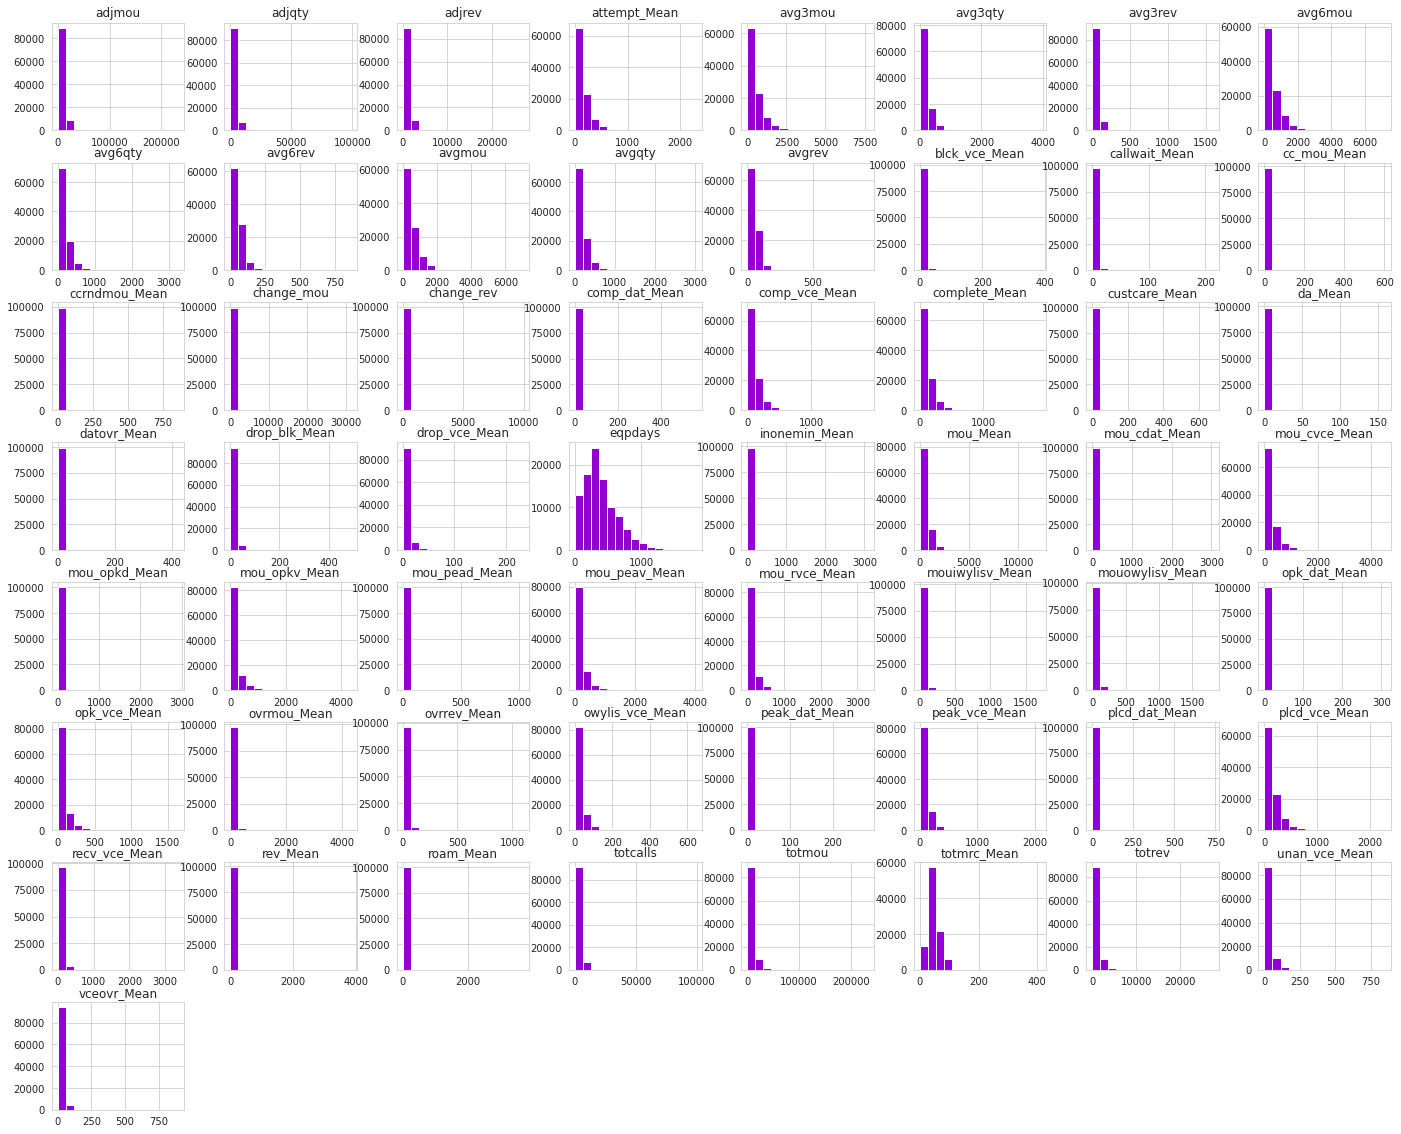

In [11]:
# plotar o histograma das variáveis numéricas
df[cols_outl].hist(bins=15, figsize=(24,20), color='darkviolet');


As variáveis são independentes e pode ocorrer de excluirmos linhas de outras variais sem relação com os outliers. Desta forma vamos optar de avaliar como os outliers interferem na dinâmica da rotividade dos clientes sem retira-los.
--

---

<h2 align="center"> 
	Avaliando as correlações entre as variáveis
</h2>

Para gerar qualquer relação entre os dados primeiramente precisamos analisar os **coeficientes de correlação**. Estes são um bom indicador de associação entre 2 variáveis, ou seja, se estas conteplam informações em .
--

### A **corelação de Pearson** que avalia linearmente a relação dos coeficientes.

Para isso utilizaremo um mapa de calor que irá relacionar uma matriz de correlação que avalia a relação de todas as variáveis entre si. Na diagonal principal o valor é máximo pois é a relação própia feature com ela mesma. Para avaliar os valores seguimos as seguintes regras, onde $r$ é o coeficiente de correlação:

1. Valores de $r$ ficam entre $-1 < r < 1$;
2. $r$ nos extremos significam correlação perfeita e mudando apenas o sentido;
3. Tecnicas de escalonamento não altera os valores de $r$;
4. Não fucionam para casos não lineares;

A biblioteca pandas nos forncesse um metodo rápido de calcularmos esta correlação. Abaixo encontra-se o script executado para encontrar as correlações com os melhores valores maiores que `abs(0.85)`.

In [12]:
coor = df_num_analise.corr()

lista_pearson = []

#   Coletamos as correlações por meio de uma varredura
for i in coor.index:
    for j in coor.columns:
        if ((coor.loc[i,j] > 0.85 or coor.loc[i,j] < -0.85) and i!=j):
            if ([i,j] not in lista_pearson) and ([j,i] not in lista_pearson) :
                lista_pearson.append([i,j])

#   Adicionamos os dados da varredura em um dataframe pandas
Good_correlations = pd.DataFrame(lista_pearson, columns=['correlation1','correlation2'])   
Good_correlations.correlation1.value_counts()

avg3qty          8
attempt_Mean     7
avg3mou          5
comp_vce_Mean    4
adjmou           3
comp_dat_Mean    3
complete_Mean    3
avg6qty          3
avg6mou          3
adjqty           2
ovrmou_Mean      2
avgmou           2
avg6rev          2
avg3rev          2
opk_vce_Mean     1
plcd_vce_Mean    1
adjrev           1
mou_peav_Mean    1
inonemin_Mean    1
mou_Mean         1
mou_cdat_Mean    1
peak_dat_Mean    1
cc_mou_Mean      1
totcalls         1
opk_dat_Mean     1
peak_vce_Mean    1
mou_cvce_Mean    1
ovrrev_Mean      1
Name: correlation1, dtype: int64

Foram observados 63 relações lineares forte entre as features. Essa análise se torna impresicidivel para realizar a analise, pois ela nos tras a dependecia e o relacionamento entre as variáveis.
--

---

---

---

Avaliados os dados e ter entendido parte do funcinamento agora vamos para a segunda parte do desafio.
--

<h1 align="center"> 
	Levantando hipóteses
</h1>

Com base na análise exploratória dos dados podemos observar que exitem muitos outliers nas variáveis categoricas, assim como existem muitas variáveis de classificação booleana. Além disso podemos observar que exitem 63 ligações lineares entre as features, o que pode nos passar a ideia de influencia entre variaveis.

Pensando nisso, podemos começar a pensar em algumas hipoteses para responder a seguinte pergunta:

# Qual o perfil de cliente que possui maior probabilidade de evasão?

Quando trabalhamos com perfil, temos duas ordem de features as de indentificação e as de dinâmica. Nesta primeira parte do notebook consiste apenas em análisar e tentar entender quais features podem impacta mais na evasão dos clientes. Logo, para isso levatamos as seguintes Hipotéses:

1. A variável `HHstatin` é uma variável categórica que classifica os status de um lar. A sua classificação impacta diretamente na classificação churn.
2. A variável `hnd_webcap` que classifica a capacidade do uso da internet do aparelho. Acredito que essa variavel possa ser uma das variaveis que impactam diretamente no evasão dos clientes
3. A variável `crclscod` que é o Código de classe de crédito. Como é feito o credito pode dar dor de cabeça a longo prazo para os clientes, dessa forma acreditamos que a classe de credito imposta pode ser impactante.

# Churn

Quando você para de utilizar um produto, por senso comum, ou você não é do seu interesse fazer o uso ou os gastos estão mais altos que gostaria. Partindo deste presuposto, vamos avaliar como os dados contido no dataframe pode nos dar aporte para responder essas perguntas. Seguindo esta idea, foram levantadas as seguintes features que podem nos nortear a respeito deste questionamento:

* `complete_Mean`: número médio de chamadas completadas
* `mou_Mean` :  Número médio de minutos mensais de uso
* `change_rev`: Variação percentual da receita mensal em relação à média dos três meses anteriores.
* `ownrent` : Classificação dos clientes como home owner ou renter status.

Primeiramente vamos ver a amostragem da variavel `churn` que vai ser apresentada por um gráfico de barras abaixo:

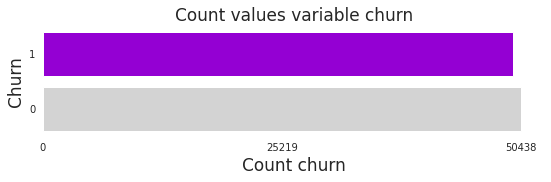

In [13]:
font = {'weight': 'normal','size': 17,}
font2 = {'family': 'serif', 'color':'black','weight': 'normal','size': 22,}
aux = df.churn.value_counts()
plt.figure(figsize=(9,2))
plt.barh(aux.index, aux.values, color=['lightgray','darkviolet']);
plt.xticks([0, aux.values.max()*0.5, aux.values.max()]);
plt.yticks([False, True]);
plt.ylabel('Churn', fontdict=font)
plt.xlabel('Count churn', fontdict=font,)
plt.grid(False)
plt.box(False)
plt.title('Count values variable churn', fontdict=font)
plt.show()

Podemos verificar que os dados da varialvel churn não está desbalanceado. O que vai nos favorecer e muito na construção do modelo.
--

Visando pelo vies de falta de interesse vamos avaliar como são o numéro médio das chamadas completadas. Para isso, agrupamos os dados da variavel `churn` e da `complete_Mean` que corresponde a evasão e as chamadas medias completadas. O resultado esta apresentado no script abaixo:

In [27]:
aux = df.groupby(['churn']).complete_Mean.median() #número médio de chamadas completadas
print(f'Para os false churn: {aux.values[0]} \nPara os True churn : {aux.values[1]}')

Para os false churn: 81.33333333 
Para os True churn : 71.33333333


> O uso da mediana se justifica por esta ser robusta a outliers e vale relembrar que optamos por nao tratar.

Podemos observar que embora a **difereça seja pequena** no passa a ideia de que os que evadem o serviço tem tempo menores de uso.
--

Seguindo no mesmo vies, vamos avaliar como é a distribuição do numero médio de minutos mensais de uso do serviço.Para isso, agrupamos os dados da variavel `churn` e da `mou_Mean` que corresponde a evasão e as chamadas medias completadas. O resultado esta apresentado no script abaixo:

In [28]:
aux = df.groupby(['churn']).mou_Mean.median() # Número médio de minutos mensais de uso
print(f'Para os false churn: {aux.values[0]} \nPara os True churn : {aux.values[1]}')

Para os false churn: 380.5 
Para os True churn : 329.75


Podemos observar que quando os clientes evadem possuem um pequeno diferença nos valores médios observados. No entanto acredito que em ambos os casos não passam muita tendencia sobre o reusltado.
--

Pensado nisso vamos observar agora pelo vies dos gastos o quanto os gatos podem influenciar na variável `churn`. Em uma primeira análise **vamos verificar como a variação percentual da receita mensal em relação à média dos três meses anteriores implicou na evasão dos clientes.** Para isso realizamos um agrupamento da feature `churn` e `change_rev` que representam respectivamente os valores do churn e a variação observada. **Por meio do script abaixo avaliamos o valor médio obtido e o valor máximo.**

In [33]:
aux = df.groupby(['churn']).change_rev.median() #variação percentual da receita mensal em relação à média dos três meses anteriores
aux1 = df.groupby(['churn']).change_rev.max() #Variação percentual da receita mensal em relação à média dos três meses anteriores
print(f'Mediana:\nPara os false churn: {aux.values[0]} \nPara os True churn : {aux.values[1]}\n')
print(f'Valor maximo: \nPara os false churn: {aux1.values[0]} \nPara os True churn : {aux1.values[1]}')

Mediana:
Para os false churn: 4.185 
Para os True churn : 4.88625

Valor maximo: 
Para os false churn: 1346.975 
Para os True churn : 9963.6575


Podemos observar que embora avaliando a média temos uma porcentagem consideravel, mas quando observamos os valores maximos temos as presenças dos outliers que são diferença enorme e acredito gerir tendência nos reultados de indentificação da evasão.
--

Agora vamos realizar um *drill down* e verificar aonde esta localizado essa diferença. Para isso, vamos verificar o local de locação do serviço. Neste primeiro caso, ele nos informa que o local do serviço é alugado, com isso o cliente utiliza o serviço e ainda paga a casa **ou seja dois custos fixos**. Com isso vamos verificar os valores médios e máximos encontrados nesta categoria:

In [35]:
aux = df[df.ownrent == 'R'].groupby(['churn']).change_rev.median() # renter status
aux1 = df[df.ownrent == 'R'].groupby(['churn']).change_rev.max() # renter status
print(f'Mediana:\nPara os false churn: {aux.values[0]} \nPara os True churn : {aux.values[1]}\n')
print(f'Valor maximo: \nPara os false churn: {aux1.values[0]} \nPara os True churn : {aux1.values[1]}')

Mediana:
Para os false churn: 3.91625 
Para os True churn : 5.3175

Valor maximo: 
Para os false churn: 243.88 
Para os True churn : 9963.6575


Podemos observar que quando avaliamos nesta categoria temos uma diferença ainda maior na variação percentual da receita mensal em relação à média dos três meses anteriores. Aqui também está contido o valor do outlier de $9963$, isso pode ser observado no valor `false churn` com o valor muito menor em relação ao `True churn`.
--

Avaliando o outro grupo, neste caso os propios donos das casas. Neste quesito foram realizamos os mesmo passos do script anterior, no entando agora apenas trocando os grupos.

In [36]:
aux = df[df.ownrent == 'O'].groupby(['churn']).change_rev.median() # home owner
aux1 = df[df.ownrent == 'O'].groupby(['churn']).change_rev.max() # home owner
print(f'Mediana:\nPara os false churn: {aux.values[0]} \nPara os True churn : {aux.values[1]}\n')
print(f'Valor maximo: \nPara os false churn: {aux1.values[0]} \nPara os True churn : {aux1.values[1]}')

Mediana:
Para os false churn: 3.2887500000000003 
Para os True churn : 3.96

Valor maximo: 
Para os false churn: 1346.975 
Para os True churn : 694.265


Portanto, foi possivel observar que em ambos os grupos de locatários mostrou uma tendência que com uma variação percentual da receita mensal em relação à média dos três meses anteriores pode implicar na evasão dos clientes. Além disso, vimos que o tempo de uso reduzido pode trazer uma influência mas não gere tendência na evasão.
--

# **hhstatin** : Indicador principal do status do lar

Como observamos que o local que o lar estava influênciava na evasão dos clientes realizamos novamente um *drill down* e vamos observar o indicador princiapl do status do lar, o `hhstatin`. Foram observados 6 tipos de classificação de uma lar: (1) Tipo **A**, (2) Tipo **B**, (3) Tipo **C**, (4) Tipo **G**, (5) Tipo **H** e (6) Tipo **I**. Cada um desses com suas caracteristicas em especial.

Nesta análise em especifico quero buscar o comportamento das pessoas deste lar com a empresa. Para isso selecionei as seguinte features para me dar aporte nesta análise, levando em conta a correlação e o contexto proposto.
--

* `totcalls`: Total de chamadas.
* `actvsubs`: Número de assinantes ativos no domicílio.
* `months`: Meses de uso do serviço.
* `change_rev`: Variação percentual da receita mensal em relação à média dos três meses anteriores.

Na primeira análise selecionamos apenas os dados daqueles que decidiram deixar o serviço. Decidimos observar dentre esse como foram seu comportamento central (media e mediana) e somatorio de todas as ligações agrupando-as pelo indicador pricipal do status do lar. Os resultados podem ser observados no gráfico a seguir:


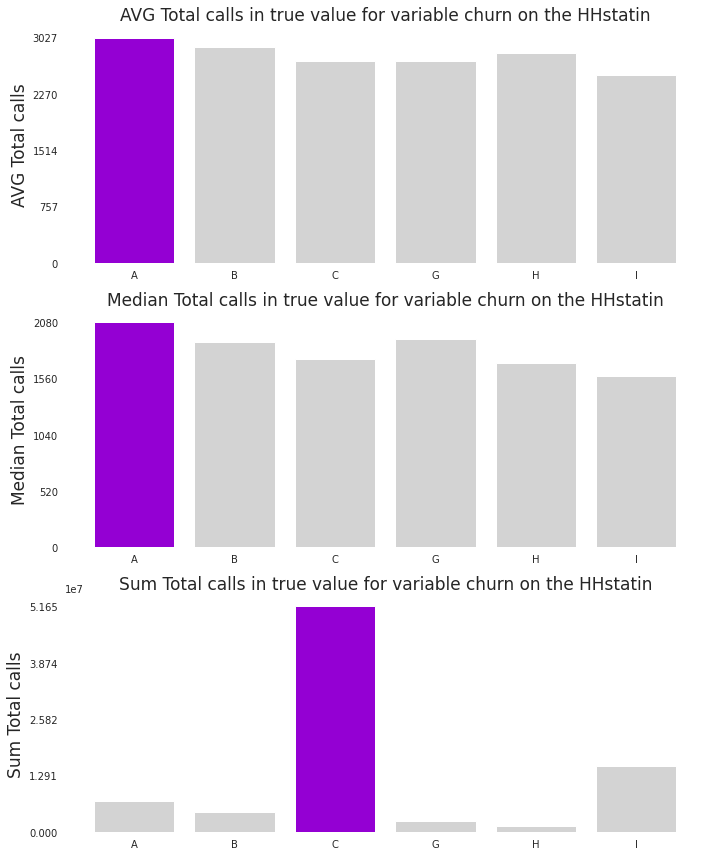

In [38]:
colum = 1
rows = 3
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

aux = df[df.churn == 1].groupby(['HHstatin']).totcalls.mean()
max = []
for j in aux.values:
    if j == aux.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')       

ax = fig.add_subplot(rows, colum, 1);
plt.box(False)
plt.bar(aux.index, aux.values, color= max);
var_label = aux.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('AVG Total calls', fontdict=font,)
plt.grid(False)
plt.title('AVG Total calls in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

aux2 = df[df.churn == 1].groupby(['HHstatin']).totcalls.median()[aux.index]
max = []
for j in aux2.values:
    if j == aux2.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')

ax = fig.add_subplot(rows, colum, 2);
plt.box(False)
plt.bar(aux2.index, aux2.values, color= max);
var_label = aux2.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux2.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Median Total calls', fontdict=font,)
plt.grid(False)
plt.title('Median Total calls in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

aux3 = df[df.churn == 1].groupby(['HHstatin']).totcalls.sum()[aux.index]
max = []
for j in aux3.values:
    if j == aux3.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')

ax = fig.add_subplot(rows, colum, 3);
plt.box(False)
plt.bar(aux3.index, aux3.values, color= max);
var_label = aux3.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux3.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Sum Total calls', fontdict=font,)
plt.grid(False)
plt.title('Sum Total calls in true value for variable churn on the HHstatin', fontdict=font)

fig.tight_layout();

Podemos observar que embora **o tipo A** apresente maior média de chamadas, **o tipo C** possuem muito mais ocorrência chamadas. Como aspecto de comparação vamos verificar quantas ocorência do indicador tem nos casos que soferam evasão:
--

In [42]:
print('Total de ocorrências:',df[df.churn == 1].HHstatin.value_counts().sum())
df[df.churn == 1].HHstatin.value_counts()

Total de ocorrências: 30226


C    19029
I     5941
A     2329
B     1557
G      888
H      482
Name: HHstatin, dtype: int64

De 30 mil casos que se tem o valor do indicador principal do status do lar, cerca de 19 mil são do grupo C.
--

Foi observado que o **tipo C** tem mais ocorrência e maior número de ligação. Pensado nisso, vamos avaliar qual o comportamento dos usuários ativos em cada casa para buscar entender o que faz este tipo se destoar do demais. Dessa maneira, fizemos um agrupamento e geramos as seguintes visualizações para representar os resultados:

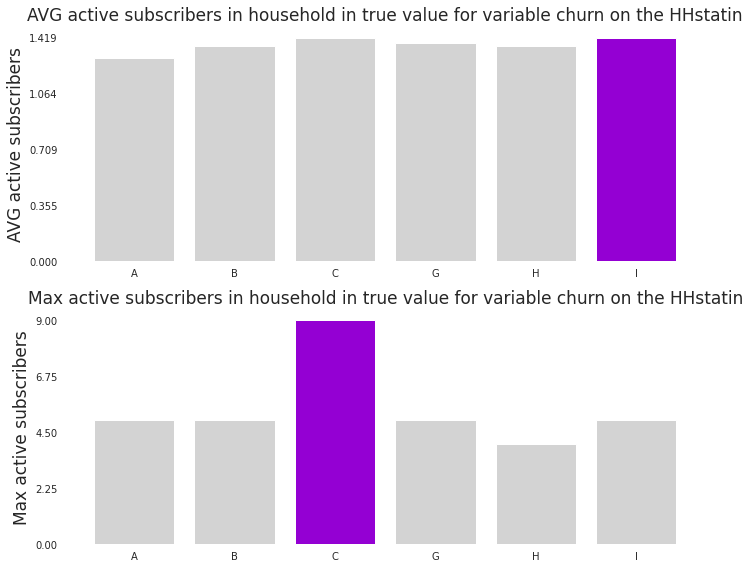

In [44]:
colum = 1
rows = 2
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

aux = df[df.churn == 1].groupby(['HHstatin']).actvsubs.mean()
max = []
for j in aux.values:
    if j == aux.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')       

ax = fig.add_subplot(rows, colum, 1);
plt.box(False)
plt.bar(aux.index, aux.values, color= max);
var_label = aux.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('AVG active subscribers', fontdict=font,)
plt.grid(False)
plt.title('AVG active subscribers in household in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

aux3 = df[df.churn == 1].groupby(['HHstatin']).actvsubs.max()[aux.index]
max = []
for j in aux3.values:
    if j == aux3.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')

ax = fig.add_subplot(rows, colum, 2);
plt.box(False)
plt.bar(aux3.index, aux3.values, color= max);
var_label = aux3.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux3.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Max active subscribers', fontdict=font,)
plt.grid(False)
plt.title('Max active subscribers in household in true value for variable churn on the HHstatin', fontdict=font)

fig.tight_layout();

Ao observarmos o valor médio temos o **Tipo I** como principal representantes de usuários ativos, no entanto o **Tipo C** conta com valor máximo de 9 usuários ativos em clientes que decidiram não utilizar mais o serviço.
--

Buscando entender por que esse tipo acaba evadindo mais, avaliaremos quantos meses de utilização do serviço este fizeram o uso. Para isso montamos uma visualização que no mostra os meses médios e maximos de utilização.

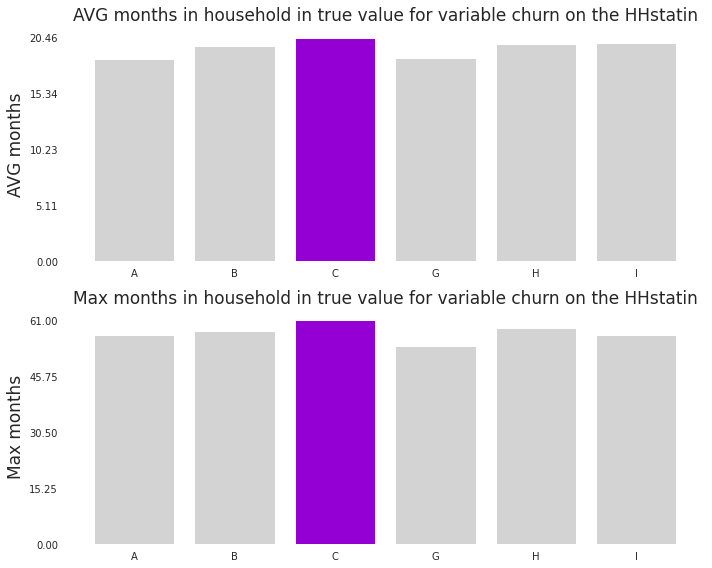

In [21]:
colum = 1
rows = 2
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

aux = df[df.churn == 1].groupby(['HHstatin']).months.mean()
max = []
for j in aux.values:
    if j == aux.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')       

ax = fig.add_subplot(rows, colum, 1);
plt.box(False)
plt.bar(aux.index, aux.values, color= max);
var_label = aux.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('AVG months', fontdict=font,)
plt.grid(False)
plt.title('AVG months in household in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

aux3 = df[df.churn == 1].groupby(['HHstatin']).months.max()[aux.index]
max = []
for j in aux3.values:
    if j == aux3.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')

ax = fig.add_subplot(rows, colum, 2);
plt.box(False)
plt.bar(aux3.index, aux3.values, color= max);
var_label = aux3.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux3.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Max months', fontdict=font,)
plt.grid(False)
plt.title('Max months in household in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

Embora todos tenham valores bem próximos, é observado que o **Tipo C** é um dos grupos que mais utilizaram o serviço antes de evadirem. Isso reforça a ideia de que existem grupos que perderam o interesse no produto.
--

Pensando nisto vamos observar variação percentual da receita mensal em relação à média dos três meses anteriores para observar se a alteração nos valores nos mostra a tendência neste indicador. Para isso realizamos o agrupamento da variação com os tipos do `HHstatin`, com isso obtemos os seguintes resultados:

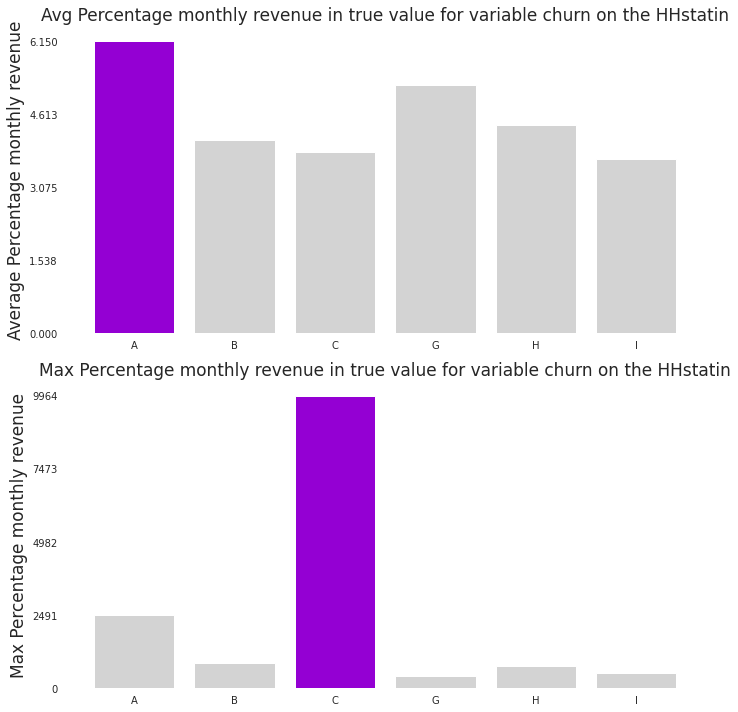

In [48]:
colum = 1
rows = 2
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

aux = df[df.churn == 1].groupby(['HHstatin']).change_rev.median()
max = []
for j in aux.values:
    if j == aux.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')       

ax = fig.add_subplot(rows, colum, 1);
plt.box(False)
plt.bar(aux.index, aux.values, color= max);
var_label = aux.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Average Percentage monthly revenue', fontdict=font)
plt.grid(False)
plt.title('Avg Percentage monthly revenue in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

aux3 = df[df.churn == 1].groupby(['HHstatin']).change_rev.max()[aux.index]
max = []
for j in aux3.values:
    if j == aux3.values.max() :
        max.append('darkviolet')
    else:
        max.append('lightgray')

ax = fig.add_subplot(rows, colum, 2);
plt.box(False)
plt.bar(aux3.index, aux3.values, color= max);
var_label = aux3.values.max()
plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
plt.xticks(aux3.index)
#plt.xlabel('HHstatin', fontdict=font)
plt.ylabel('Max Percentage monthly revenue', fontdict=font)
plt.grid(False)
plt.title('Max Percentage monthly revenue in true value for variable churn on the HHstatin', fontdict=font)
fig.tight_layout();

Portanto, podemos observar que o **tipo c** teve muitas ocorências naqueles que evadiram, mas não conseguimos definir a principal causa deste obter tantas ocorrencias. Foi constado também a presença de outliers contidos no **tipo c** em relação a variação de renda mensal, assim como que os meses não influenciam diretamente nesta categoria.
--

# **hnd_webcap** : Capacidade da web do aparelho

Quando falamos da capacidade web do aparelho devemos avaliar a sua usuabilidade e como ele responde ao tráfego de dados. Ao analisarmos os dados podemos verificar que os dados que podem fazer isso e possuem uma certa correlação entre eles tratam dos seguintes:

* `peak_vce_Mean`: Número médio de chamadas de voz de inbound e outbound de pico
* `peak_dat_Mean`: Número médio de chamadas de dados de picos
* `mou_pead_Mean`: Média de minutos não arredondados de uso de chamadas de dados de pico
* `opk_vce_Mean`: Número médio de chamadas de voz fora do horário de pico
* `opk_dat_Mean`: Número médio de chamadas de dados fora de pico
* `mou_opkd_Mean`: Média de minutos não arredondados de uso de chamadas de dados fora de pico

Acreditamos que como chamadas de voz ou de dados podem ser avaliados em conjunto da capacidade web do aparelho. Como o foco da nossa análise vamos trabalhar com os dados quando houve evasão dos clientes. Analisando propiamente a variável `hnd_webcap` temos a seguinte configuração de distribuição dos dados:

In [23]:
df[df.churn==1].hnd_webcap.value_counts()

WCMB    35655
WC       7794
UNKW       86
Name: hnd_webcap, dtype: int64

Podemos verificar 3 clases de classificação da capacidade da web do aparelho. Uma das classe possui mais ocorrência que as outras, assim dominando a maior parte da amostragem. A capacidade de prover a web esta diretamente ligada ao trafego de dados com isso as chamadas de voz entram nesta análise e isso explica a correlação entre elas. 

Pensado nisso, vamos avaliar a média destas ocorrência afim de verificar as principais ocrrência observadas neste contexto. A vizualização abaixo agrupou todas as features com o `hnd_webcap` e coletou a media das ocorrencia por tipo, os resultados encontra-se abaixo:

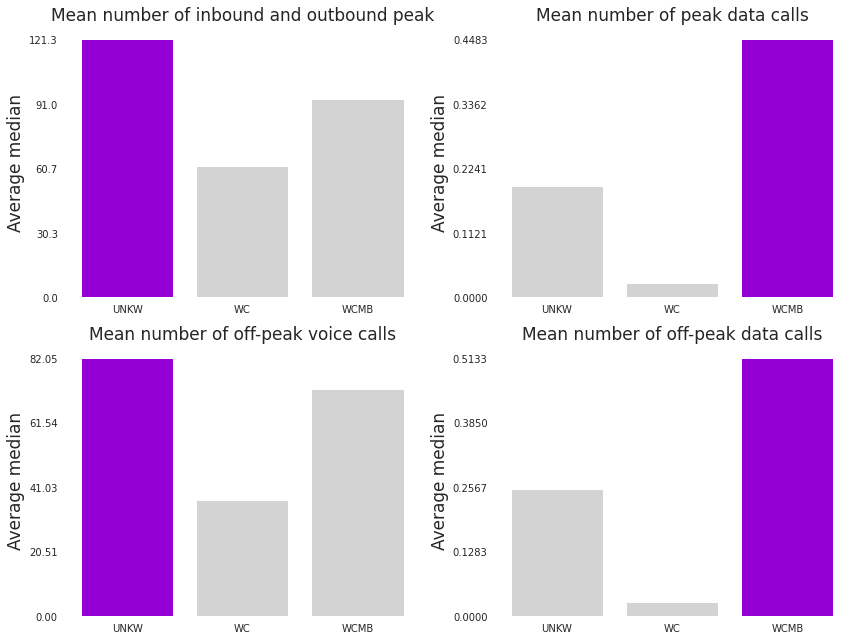

In [66]:
col = ['peak_vce_Mean','peak_dat_Mean','opk_vce_Mean','opk_dat_Mean']
 
title = [
    'Mean number of inbound and outbound peak',
    'Mean number of peak data calls',
    'Mean number of off-peak voice calls',
    'Mean number of off-peak data calls',
]

colum = 2
rows = 2
fig = plt.figure(figsize=(12,9))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
     
for ind, col in enumerate(col):
    
    aux = df[df.churn == 1].groupby(['hnd_webcap'])[col].mean()
    max = []
    for j in aux.values:
        if j == aux.values.max() :
            max.append('darkviolet')
        else:
            max.append('lightgray')  
    a = ind+1
    ax = fig.add_subplot(rows, colum, a);
    plt.box(False)
    plt.bar(aux.index, aux.values, color= max);
    var_label = aux.values.max()
    plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
    plt.xticks(aux.index)
    plt.ylabel('Average median', fontdict=font)
    plt.grid(False)
    plt.title(title[ind], fontdict=font)
    fig.tight_layout();


Podemos visualizar que o tipo de capacidade não influenciou nos numeros médios de 

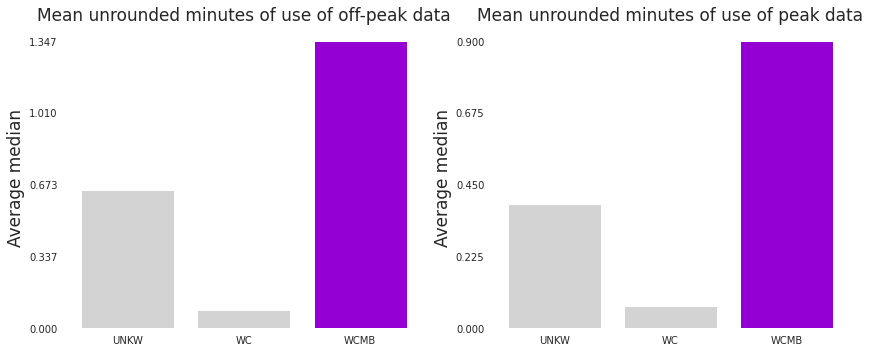

In [69]:
col = ['mou_opkd_Mean','mou_pead_Mean']
 
title = [
    'Mean unrounded minutes of use of off-peak data',
    'Mean unrounded minutes of use of peak data'
]

colum = 2
rows = 1
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
     
for ind, col in enumerate(col):
    
    aux = df[df.churn == 1].groupby(['hnd_webcap'])[col].mean()
    max = []
    for j in aux.values:
        if j == aux.values.max() :
            max.append('darkviolet')
        else:
            max.append('lightgray')  
    a = ind+1
    ax = fig.add_subplot(rows, colum, a);
    plt.box(False)
    plt.bar(aux.index, aux.values, color= max);
    var_label = aux.values.max()
    plt.yticks([0,var_label*0.25 ,var_label*0.5,var_label*0.75,var_label])
    plt.xticks(aux.index)
    plt.ylabel('Average median', fontdict=font)
    plt.grid(False)
    plt.title(title[ind], fontdict=font)
    fig.tight_layout();